# Create linear regression from scratch

## Import libraries

In [363]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from datetime import datetime

## Create linear regression class
This class will be responsible to build a machine learning model using linear regression algorithm.

In [364]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.bias = 0
        self.weights = None
        self.train_losses = []
        self.val_losses = []

    def _print_loss(self, epoch, train_loss, val_loss):
        # Less than 100
        if self.n_iterations < 100:
            print(f"Epoch {epoch + 1}:")
            print(f"  Train Loss: {train_loss:.6f}")
            print(f"  Val Loss: {val_loss:.6f}\n")

        # More than or equals 100 and it's a multiple of 100, e.g. 1000
        elif self.n_iterations % 100 == 0:
            if (epoch + 1) % 100 == 0:  # Print every 100 iterations
                print(f"Epoch {epoch + 1}:")
                print(f"  Train Loss: {train_loss:.6f}")
                print(f"  Val Loss: {val_loss:.6f}\n")

        # More than 100 and it's not a multiple of 100, e.g. 121
        else:
            if self.n_iterations - epoch == 1:  # Print the last iteration
                print(f"Epoch {epoch + 1}:")
                print(f"  Train Loss: {train_loss:.6f}")
                print(f"  Val Loss: {val_loss:.6f}\n")
            else:
                if (epoch + 1) % 100 == 0:  # Print every 100 iterations
                    print(f"Epoch {epoch + 1}:")
                    print(f"  Train Loss: {train_loss:.6f}")
                    print(f"  Val Loss: {val_loss:.6f}\n")

    def fit(self, X_train, y_train, X_val, y_val):
        n_samples, n_features = X_train.shape
        self.weights = np.zeros(n_features)  # Initial weights = 0

        for epoch in range(self.n_iterations):
            y_pred_train = self.predict(X_train)
            y_pred_val = self.predict(X_val)

            # Compute gradients
            dw = np.dot(X_train.T, (y_pred_train - y_train)) / n_samples
            db = np.sum(y_pred_train - y_train) / n_samples

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Compute and store losses
            train_loss = mse(y_train, y_pred_train)
            val_loss = mse(y_val, y_pred_val)
            self.train_losses.append(train_loss)
            self.val_losses.append(val_loss)

            self._print_loss(epoch, train_loss, val_loss)

    def predict(self, X):
        return np.dot(X, self.weights.T) + self.bias

    def plot_losses(self):
        plt.figure(figsize=(10, 6))
        plt.plot(range(self.n_iterations), self.train_losses, label="Training Loss")
        plt.plot(range(self.n_iterations), self.val_losses, label="Validation Loss")
        plt.xlabel("Iterations")
        plt.ylabel("Mean Squared Error")
        plt.title("Training and Validation Loss over Iterations")
        plt.legend()
        plt.show()

## Create create helper functions (static functions)

In [365]:
def generate_random_dataset(n_samples=1000, n_features=3, seed=None, noise=0.1):
    """Generate a random DataFrame."""
    if seed:
      np.random.seed(seed)

    X = np.random.randn(n_samples, n_features)
    weights = np.random.randn(n_features)
    y = np.dot(X, weights) + np.random.randn(n_samples) * noise

    df = pd.DataFrame(X, columns=[f"feature_{i}" for i in range(n_features)])
    df["target"] = y

    return df


def train_test_split(X, y, test_size=0.2, seed=None):
    """Split arrays or matrices into random train and test subsets."""
    if seed:
        np.random.seed(seed)

    n_samples = len(X.values)
    n_test = int(n_samples * test_size)
    indices = np.random.permutation(n_samples)
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]

    X_train, X_val = X.iloc[train_indices], X.iloc[test_indices]
    y_train, y_val = y.iloc[train_indices], y.iloc[test_indices]

    return X_train, y_train, X_val, y_val


def mse(y_actual, y_prediction):
    return np.mean((y_actual - y_prediction) ** 2)


def plot_regression_results(X, y, y_pred):
    """Plot regression line."""
    n_features = X.shape[1]
    n_rows = (n_features + 1) // 2  # Calculate number of rows for subplots
    feature_names = X.columns.values.tolist()

    fig, axes = plt.subplots(n_rows, 2, figsize=(15, 5 * n_rows))
    axes = axes.flatten()  # Flatten the 2D array of axes for easy indexing

    for i in range(n_features):
        ax = axes[i]
        ax.scatter(X.values[:, i], y, alpha=0.5, label='Actual')
        ax.scatter(X.values[:, i], y_pred, color='red', alpha=0.5, label='Predicted')
        ax.set_xlabel(feature_names[i])
        ax.set_ylabel('Target')
        ax.legend()
        ax.set_title(f'Feature {i+1} vs Target')

    # Remove any unused subplots
    for i in range(n_features, len(axes)):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()

# Test using a dummy dataset

## Train

In [366]:
# Generate a dummy dataset for training
df_dummy = generate_random_dataset()

# Prepare data
X_dummy = df_dummy.drop("target", axis=1)
y_dummy = df_dummy["target"]

X_train_dummy, y_train_dummy, X_val_dummy, y_val_dummy = train_test_split(X_dummy, y_dummy)

# Create and train the model
model = LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train_dummy, y_train_dummy, X_val_dummy, y_val_dummy)

Epoch 100:
  Train Loss: 0.485633
  Val Loss: 0.514268

Epoch 200:
  Train Loss: 0.062981
  Val Loss: 0.068891

Epoch 300:
  Train Loss: 0.016149
  Val Loss: 0.017189

Epoch 400:
  Train Loss: 0.010743
  Val Loss: 0.010492

Epoch 500:
  Train Loss: 0.010088
  Val Loss: 0.009428

Epoch 600:
  Train Loss: 0.010004
  Val Loss: 0.009201

Epoch 700:
  Train Loss: 0.009993
  Val Loss: 0.009136

Epoch 800:
  Train Loss: 0.009991
  Val Loss: 0.009114

Epoch 900:
  Train Loss: 0.009991
  Val Loss: 0.009106

Epoch 1000:
  Train Loss: 0.009991
  Val Loss: 0.009103



## Plot the result

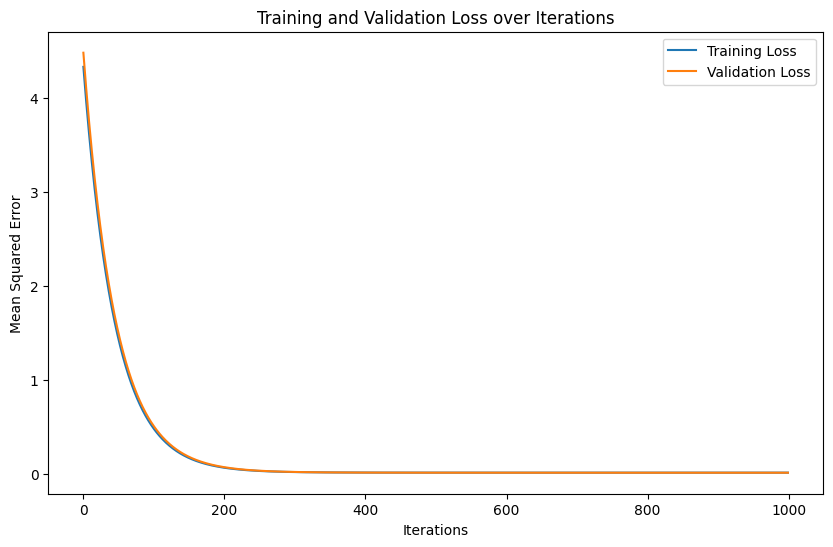

In [367]:
# Plot the losses
model.plot_losses()

Mean Squared Error on test set: 0.009103271391949018


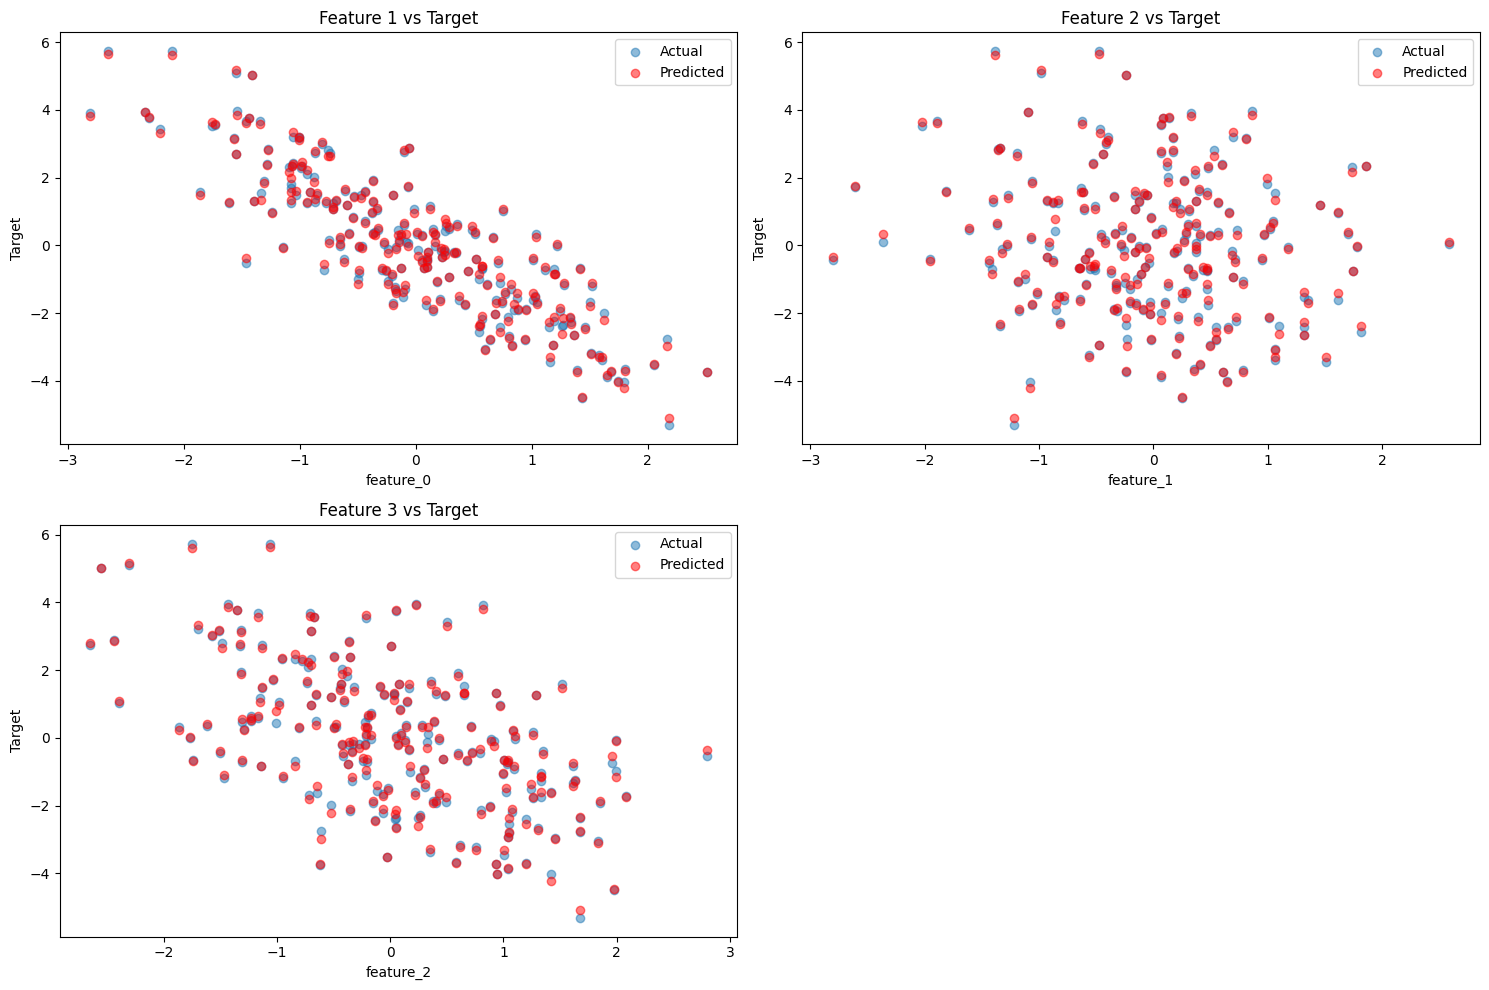

In [368]:
# Make predictions on validation set
y_pred_val_dummy = model.predict(X_val_dummy)

# Calculate Mean Squared Error
print(f"Mean Squared Error on test set: {mse(y_val_dummy, y_pred_val_dummy)}")

# Plot the regression line
plot_regression_results(X_val_dummy, y_val_dummy, y_pred_val_dummy)

# Test using a real dataset

## Prepare dataset

In [369]:
%%bash

# Check if the dataset already exists
if test -e "airbnb-listings-in-major-us-cities-deloitte-ml.zip"; then
    echo "Dataset already exists."
else
    kaggle datasets download -d rudymizrahi/airbnb-listings-in-major-us-cities-deloitte-ml
fi

Dataset already exists.


In [370]:
%%bash

rm *.csv
unzip airbnb-listings-in-major-us-cities-deloitte-ml

Archive:  airbnb-listings-in-major-us-cities-deloitte-ml.zip
  inflating: test.csv                
  inflating: train.csv               


In [371]:
pd.options.display.max_columns = None

df = pd.read_csv("train.csv")

## EDA

In [372]:
df.head()

,id,log_price,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,latitude,longitude,name,neighbourhood,number_of_reviews,review_scores_rating,thumbnail_url,zipcode,bedrooms,beds
0,6901257,5.010635,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",3,1.0,Real Bed,strict,True,NYC,"Beautiful, sunlit brownstone 1-bedroom in the ...",2016-06-18,t,t,NaN,2012-03-26,f,2016-07-18,40.696524,-73.991617,Beautiful brownstone 1-bedroom,Brooklyn Heights,2,100.0,https://a0.muscache.com/im/pictures/6d7cbbf7-c...,11201,1.0,1.0
1,6304928,5.129899,Apartment,Entire home/apt,"{""Wireless Internet"",""Air conditioning"",Kitche...",7,1.0,Real Bed,strict,True,NYC,Enjoy travelling during your stay in Manhattan...,2017-08-05,t,f,100%,2017-06-19,t,2017-09-23,40.766115,-73.989040,Superb 3BR Apt Located Near Times Square,Hell's Kitchen,6,93.0,https://a0.muscache.com/im/pictures/348a55fe-4...,10019,3.0,3.0
2,7919400,4.976734,Apartment,Entire home/apt,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",5,1.0,Real Bed,moderate,True,NYC,The Oasis comes complete with a full backyard ...,2017-04-30,t,t,100%,2016-10-25,t,2017-09-14,40.808110,-73.943756,The Garden Oasis,Harlem,10,92.0,https://a0.muscache.com/im/pictures/6fae5362-9...,10027,1.0,3.0
3,13418779,6.620073,House,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki...",4,1.0,Real Bed,flexible,True,SF,This light-filled home-away-from-home is super...,NaN,t,t,NaN,2015-04-19,f,NaN,37.772004,-122.431619,Beautiful Flat in the Heart of SF!,Lower Haight,0,NaN,https://a0.muscache.com/im/pictures/72208dad-9...,94117.0,2.0,2.0
4,3808709,4.744932,Apartment,Entire home/apt,"{TV,Internet,""Wireless Internet"",""Air conditio...",2,1.0,Real Bed,moderate,True,DC,"Cool, cozy, and comfortable studio located in ...",2015-05-12,t,t,100%,2015-03-01,t,2017-01-22,38.925627,-77.034596,Great studio in midtown DC,Columbia Heights,4,40.0,NaN,20009,0.0,1.0


In [373]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74111 entries, 0 to 74110
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      74111 non-null  int64  
 1   log_price               74111 non-null  float64
 2   property_type           74111 non-null  object 
 3   room_type               74111 non-null  object 
 4   amenities               74111 non-null  object 
 5   accommodates            74111 non-null  int64  
 6   bathrooms               73911 non-null  float64
 7   bed_type                74111 non-null  object 
 8   cancellation_policy     74111 non-null  object 
 9   cleaning_fee            74111 non-null  bool   
 10  city                    74111 non-null  object 
 11  description             74111 non-null  object 
 12  first_review            58247 non-null  object 
 13  host_has_profile_pic    73923 non-null  object 
 14  host_identity_verified  73923 non-null

In [374]:
# Categorical columns
df.describe(include=["boolean", "object"])

,property_type,room_type,amenities,bed_type,cancellation_policy,cleaning_fee,city,description,first_review,host_has_profile_pic,host_identity_verified,host_response_rate,host_since,instant_bookable,last_review,name,neighbourhood,thumbnail_url,zipcode
count,74111,74111,74111,74111,74111,74111,74111,74111,58247,73923,73923,55812,73923,74111,58284,74111,67239,65895,73145
unique,35,3,67122,5,5,2,6,73479,2554,2,2,80,3087,2,1371,73359,619,65883,769
top,Apartment,Entire home/apt,{},Real Bed,strict,True,NYC,"Hello, I've been running guest house for Korea...",2017-01-01,t,t,100%,2015-03-30,f,2017-04-30,Bunk bed in the Treat Street Clubhouse,Williamsburg,https://a0.muscache.com/im/pictures/70087089/b...,11211.0
freq,49003,41310,586,72028,32374,54403,32349,8,293,73697,49748,43254,246,54660,1344,8,2862,3,1368


In [375]:
low_cardinality_columns = [
    "property_type",
    "room_type",
    "bed_type",
    "cancellation_policy",
    "cleaning_fee",
    "city",
    "host_has_profile_pic",
    "host_identity_verified",
    "host_response_rate",
    "instant_bookable"
]
for column in low_cardinality_columns:
    print(f"{column} has {df[column].unique()}\n")

property_type has ['Apartment' 'House' 'Condominium' 'Loft' 'Townhouse' 'Hostel'
 'Guest suite' 'Bed & Breakfast' 'Bungalow' 'Guesthouse' 'Dorm' 'Other'
 'Camper/RV' 'Villa' 'Boutique hotel' 'Timeshare' 'In-law' 'Boat'
 'Serviced apartment' 'Castle' 'Cabin' 'Treehouse' 'Tipi' 'Vacation home'
 'Tent' 'Hut' 'Casa particular' 'Chalet' 'Yurt' 'Earth House'
 'Parking Space' 'Train' 'Cave' 'Lighthouse' 'Island']

room_type has ['Entire home/apt' 'Private room' 'Shared room']

bed_type has ['Real Bed' 'Futon' 'Pull-out Sofa' 'Couch' 'Airbed']

cancellation_policy has ['strict' 'moderate' 'flexible' 'super_strict_30' 'super_strict_60']

cleaning_fee has [ True False]

city has ['NYC' 'SF' 'DC' 'LA' 'Chicago' 'Boston']

host_has_profile_pic has ['t' nan 'f']

host_identity_verified has ['t' 'f' nan]

host_response_rate has [nan '100%' '71%' '68%' '67%' '83%' '50%' '90%' '86%' '92%' '82%' '80%'
 '89%' '93%' '99%' '0%' '88%' '96%' '70%' '94%' '91%' '25%' '95%' '98%'
 '62%' '29%' '33%' '81%' '63%'

In [376]:
# Show samples of high cardinality column, except description, name, and thumbnail_url.
df["amenities"].sample(10)

,amenities
58885,"{""Cable TV"",""Wireless Internet"",Kitchen,""Buzze..."
72699,"{TV,Internet,""Wireless Internet"",""Air conditio..."
27027,"{TV,Internet,""Wireless Internet"",Kitchen,Heati..."
27444,{}
19951,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
53557,"{TV,""Cable TV"",""Wireless Internet"",Kitchen,""Fr..."
17442,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
52929,"{TV,""Cable TV"",""Wireless Internet"",""Air condit..."
590,"{TV,""Wireless Internet"",""Air conditioning"",Kit..."
36347,"{TV,Internet,""Wireless Internet"",""Air conditio..."


In [377]:
df["first_review"].sample(10)

,first_review
7159,2010-10-04
61615,2017-03-17
3355,2015-06-19
9052,2016-11-26
42177,2015-05-14
27930,2016-05-08
45600,NaN
42031,2017-02-18
70487,2016-08-03
8925,2017-02-20


In [378]:
df["host_since"].sample(10)

,host_since
73140,2014-04-14
56570,2016-06-11
55436,2014-09-25
32135,2016-07-06
47003,2015-06-21
49366,2014-10-14
40357,2013-11-20
42399,2012-07-29
70449,2017-03-17
25996,2012-11-05


In [379]:
df["last_review"].sample(10)

,last_review
8291,2017-03-14
53557,2016-06-12
13111,2017-08-10
57920,2017-09-11
29809,2017-09-16
49883,2017-02-17
12071,2017-09-17
54723,2017-05-01
39278,NaN
66253,NaN


In [380]:
df["neighbourhood"].sample(10)

,neighbourhood
34108,Bernal Heights
49256,NaN
51577,Williamsburg
27808,Bedford-Stuyvesant
72829,Park Slope
56749,Santa Monica
69954,Capitol Hill
3086,Bushwick
18354,Upper West Side
39269,Chinatown


In [381]:
df["zipcode"].sample(10)

,zipcode
35009,11201.0
5865,90291
73003,11249.0
57128,20005
50622,11226
63692,90028
31790,11369.0
33034,10028
70292,20002
46963,11211.0


In [382]:
# Numerical columns
df.describe()

,id,log_price,accommodates,bathrooms,latitude,longitude,number_of_reviews,review_scores_rating,bedrooms,beds
count,7.411100e+04,74111.000000,74111.000000,73911.000000,74111.000000,74111.000000,74111.000000,57389.000000,74020.000000,73980.000000
mean,1.126662e+07,4.782069,3.155146,1.235263,38.445958,-92.397525,20.900568,94.067365,1.265793,1.710868
std,6.081735e+06,0.717394,2.153589,0.582044,3.080167,21.705322,37.828641,7.836556,0.852143,1.254142
min,3.440000e+02,0.000000,1.000000,0.000000,33.338905,-122.511500,0.000000,20.000000,0.000000,0.000000
25%,6.261964e+06,4.317488,2.000000,1.000000,34.127908,-118.342374,1.000000,92.000000,1.000000,1.000000
50%,1.225415e+07,4.709530,2.000000,1.000000,40.662138,-76.996965,6.000000,96.000000,1.000000,1.000000
75%,1.640226e+07,5.220356,4.000000,1.000000,40.746096,-73.954660,23.000000,100.000000,1.000000,2.000000
max,2.123090e+07,7.600402,16.000000,8.000000,42.390437,-70.985047,605.000000,100.000000,10.000000,18.000000


In [383]:
non_features = ["log_price", "id", "description", "name", "thumbnail_url"]
X = df.drop(columns=non_features)
y = df["log_price"]

In [384]:
X_train, y_train, X_val, y_val = train_test_split(X, y)

In [385]:
X_train.isnull().sum()

,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,160
bed_type,0
cancellation_policy,0
cleaning_fee,0
city,0
first_review,12742


In [386]:
X_val.isnull().sum()

,0
property_type,0
room_type,0
amenities,0
accommodates,0
bathrooms,40
bed_type,0
cancellation_policy,0
cleaning_fee,0
city,0
first_review,3122


In [387]:
non_numerical_columns = [col for col in X_train.columns if X_train[col].dtype in ["bool", "object"]]
numerical_columns = [col for col in X_train.columns if X_train[col].dtype not in ["bool", "object"]]

In [388]:
non_numerical_columns

['property_type',
 'room_type',
 'amenities',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'city',
 'first_review',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'host_since',
 'instant_bookable',
 'last_review',
 'neighbourhood',
 'zipcode']

In [389]:
numerical_columns

['accommodates',
 'bathrooms',
 'latitude',
 'longitude',
 'number_of_reviews',
 'review_scores_rating',
 'bedrooms',
 'beds']

## Test without preprocessing
No preprocessing can be in interpreted: minimize preprocessing to the bare essentials to avoid breaking the code/error during training.

It includes handling categorical data and missing values. Both will be just removed.

In [390]:
# Remove categorical columns
X_train_no_preprocess = X_train.drop(columns=non_numerical_columns)
X_val_no_preprocess = X_val.drop(columns=non_numerical_columns)

In [391]:
X_train_no_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59289 entries, 20385 to 57850
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accommodates          59289 non-null  int64  
 1   bathrooms             59129 non-null  float64
 2   latitude              59289 non-null  float64
 3   longitude             59289 non-null  float64
 4   number_of_reviews     59289 non-null  int64  
 5   review_scores_rating  45876 non-null  float64
 6   bedrooms              59213 non-null  float64
 7   beds                  59176 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 4.1 MB


In [392]:
X_val_no_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
Index: 14822 entries, 65092 to 5464
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   accommodates          14822 non-null  int64  
 1   bathrooms             14782 non-null  float64
 2   latitude              14822 non-null  float64
 3   longitude             14822 non-null  float64
 4   number_of_reviews     14822 non-null  int64  
 5   review_scores_rating  11513 non-null  float64
 6   bedrooms              14807 non-null  float64
 7   beds                  14804 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.0 MB


In [393]:
# Remove columns with missing values
columns_with_missing = [col for col in X_train_no_preprocess.columns if X_train_no_preprocess[col].isnull().any()]

X_train_no_preprocess.drop(columns_with_missing, axis=1, inplace=True)
X_val_no_preprocess.drop(columns_with_missing, axis=1, inplace=True)

In [394]:
X_train_no_preprocess.isnull().sum()

,0
accommodates,0
latitude,0
longitude,0
number_of_reviews,0


In [395]:
X_val_no_preprocess.isnull().sum()

,0
accommodates,0
latitude,0
longitude,0
number_of_reviews,0


### Train

In [396]:
# Init new model
model = LinearRegression(learning_rate=0.01, n_iterations=10)
model.fit(X_train_no_preprocess, y_train, X_val_no_preprocess, y_val)

Epoch 1:
  Train Loss: 23.387554
  Val Loss: 23.363944

Epoch 2:
  Train Loss: 255835.580410
  Val Loss: 256751.151634

Epoch 3:
  Train Loss: 2975201442.768831
  Val Loss: 2987323406.084160

Epoch 4:
  Train Loss: 34602370794375.898438
  Val Loss: 34745353929965.925781

Epoch 5:
  Train Loss: 402435034980618560.000000
  Val Loss: 404100670288350912.000000

Epoch 6:
  Train Loss: 4680429574777684885504.000000
  Val Loss: 4699805016512296124416.000000

Epoch 7:
  Train Loss: 54434676666743621750358016.000000
  Val Loss: 54660023278036219928248320.000000

Epoch 8:
  Train Loss: 633090184667741389208441323520.000000
  Val Loss: 635711034061582270416805691392.000000

Epoch 9:
  Train Loss: 7363012081001586470741074612584448.000000
  Val Loss: 7393493285562836639525669934465024.000000

Epoch 10:
  Train Loss: 85633845252912822193278876232791883776.000000
  Val Loss: 85988350014670583333688998265844924416.000000



### Plot the result

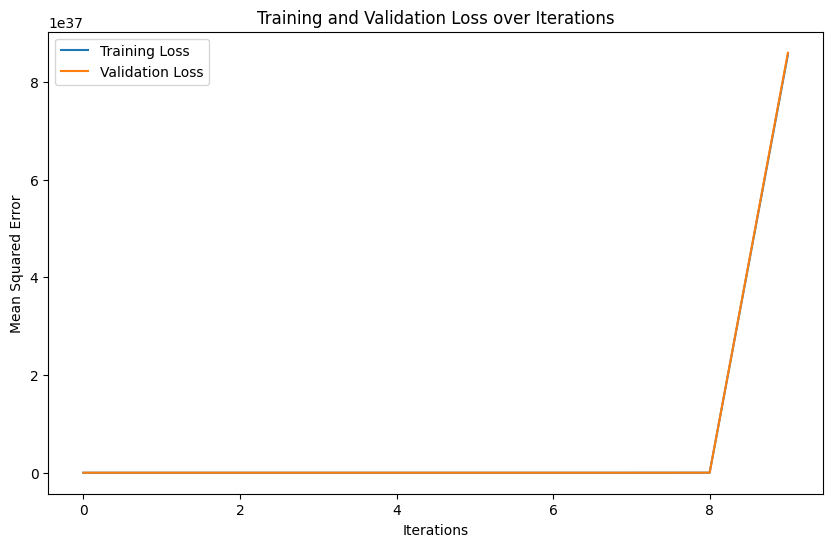

In [397]:
# Plot the losses
model.plot_losses()

Mean Squared Error on validation set: 1.0000680397944091e+42


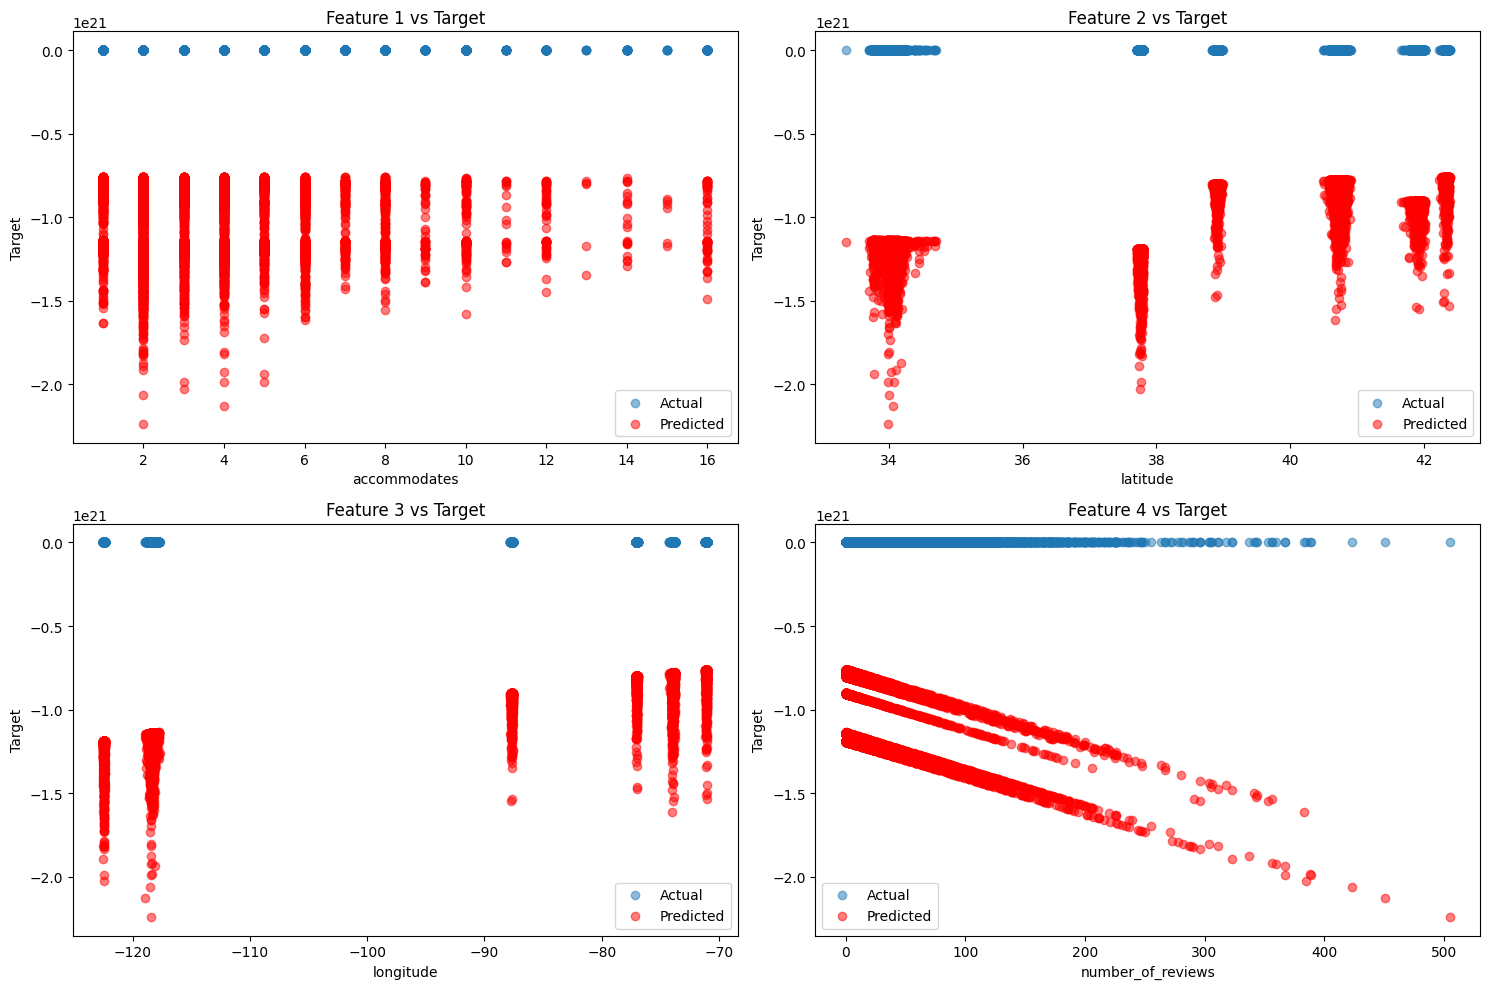

In [398]:
# Make predictions on validation set
y_pred_val = model.predict(X_val_no_preprocess)

# Calculate Mean Squared Error
print(f"Mean Squared Error on validation set: {mse(y_val, y_pred_val)}")

# Plot the regression line
plot_regression_results(X_val_no_preprocess, y_val, y_pred_val)

## Test with preprocessing

In [399]:
X_train_preprocess = X_train.copy()
X_val_preprocess = X_val.copy()

### Handle non-numerical columns

#### Boolean columns

In [400]:
# All boolean literals will be converted to integer 1/0.
boolean_columns = ["cleaning_fee", "host_has_profile_pic", "host_identity_verified", "instant_bookable"]

for column in boolean_columns:
    if column == "cleaning_fee":
        X_train_preprocess[column] = X_train_preprocess[column].map({True: 1, False: 0})
        X_val_preprocess[column] = X_val_preprocess[column].map({True: 1, False: 0})
    else:
        X_train_preprocess[column] = X_train_preprocess[column].map(lambda x: 1 if x == "t" else 0)
        X_val_preprocess[column] = X_val_preprocess[column].map(lambda x: 1 if x == "t" else 0)

    X_train_preprocess[column] = pd.to_numeric(X_train_preprocess[column])
    X_val_preprocess[column] = pd.to_numeric(X_val_preprocess[column])

In [401]:
for column in boolean_columns:
    print(f"{column} has {X_train_preprocess[column].unique()}")

cleaning_fee has [1 0]
host_has_profile_pic has [1 0]
host_identity_verified has [1 0]
instant_bookable has [0 1]


#### Datetime columns

In [402]:
# First review, last review, and host since may give insights about the longevity, recency, and engagement of the place.
X_train_preprocess["first_review"] = pd.to_datetime(X_train_preprocess["first_review"])
X_val_preprocess["first_review"] = pd.to_datetime(X_val_preprocess["first_review"])

X_train_preprocess["last_review"] = pd.to_datetime(X_train_preprocess["last_review"])
X_val_preprocess["last_review"] = pd.to_datetime(X_val_preprocess["last_review"])

X_train_preprocess["host_since"] = pd.to_datetime(X_train_preprocess["host_since"])
X_val_preprocess["host_since"] = pd.to_datetime(X_val_preprocess["host_since"])

In [403]:
current_date = pd.to_datetime(datetime.now().date())

X_train_preprocess["time_since_first_review"] = (current_date - X_train_preprocess["first_review"]).dt.days
X_train_preprocess["time_since_last_review"] = (current_date - X_train_preprocess["last_review"]).dt.days
X_train_preprocess["time_since_hosted"] = (current_date - X_train_preprocess["host_since"]).dt.days
X_train_preprocess["review_duration"] = (X_train_preprocess["last_review"] - X_train_preprocess["first_review"]).dt.days

# First and last review month -> might capture seasonal trends.
X_train_preprocess["first_review_month"] = X_train_preprocess["first_review"].dt.month
X_train_preprocess["last_review_month"] = X_train_preprocess["last_review"].dt.month

X_val_preprocess["time_since_first_review"] = (current_date - X_val_preprocess["first_review"]).dt.days
X_val_preprocess["time_since_last_review"] = (current_date - X_val_preprocess["last_review"]).dt.days
X_val_preprocess["time_since_hosted"] = (current_date - X_val_preprocess["host_since"]).dt.days
X_val_preprocess["review_duration"] = (X_val_preprocess["last_review"] - X_val_preprocess["first_review"]).dt.days
X_val_preprocess["first_review_month"] = X_val_preprocess["first_review"].dt.month
X_val_preprocess["last_review_month"] = X_val_preprocess["last_review"].dt.month

X_train_preprocess.drop(columns=["first_review", "host_since", "last_review"], inplace=True)
X_val_preprocess.drop(columns=["first_review", "host_since", "last_review"], inplace=True)

In [404]:
datetime_columns = [
    "time_since_first_review",
    "time_since_last_review",
    "time_since_hosted",
    "review_duration",
    "first_review_month",
    "last_review_month"
]

X_train_preprocess[datetime_columns].sample(10)

,time_since_first_review,time_since_last_review,time_since_hosted,review_duration,first_review_month,last_review_month
63731,2973.0,2879.0,3063.0,94.0,8.0,11.0
39537,2575.0,2575.0,3469.0,0.0,9.0,9.0
33083,2757.0,2719.0,3755.0,38.0,3.0,4.0
70328,NaN,NaN,3812.0,NaN,NaN,NaN
30500,2734.0,2720.0,2998.0,14.0,3.0,4.0
64935,2947.0,2857.0,3848.0,90.0,8.0,11.0
54192,3556.0,3351.0,3973.0,205.0,12.0,7.0
52892,2747.0,2717.0,3609.0,30.0,3.0,4.0
26972,NaN,NaN,4096.0,NaN,NaN,NaN
32808,2656.0,2633.0,3157.0,23.0,6.0,7.0


#### Categorical columns

In [405]:
low_cardinality_categorical_columns = [
    "property_type",
    "room_type",
    "bed_type",
    "cancellation_policy",
    "city"
 ]

high_cardinality_categorical_columns = [
    "neighbourhood",
    "zipcode"
]

Ordinal encoding will be applied to property type, room type, bed type, and cancellation policy.

One hot encoding will be applied to city.

Frequency encoding will be applied to eighbourhood and zipcode.

##### Ordinal encoding

In [406]:
# Define mappings for ordinal encoding
ordinal_mapping = {
    "property_type": {
        "Villa": 1,
        "Boutique hotel": 2,
        "Serviced apartment": 3,
        "Vacation home": 4,
        "Condominium": 5,
        "Townhouse": 6,
        "Loft": 7,
        "Apartment": 8,
        "House": 9,
        "Guesthouse": 10,
        "Guest suite": 11,
        "Bungalow": 12,
        "Chalet": 13,
        "Treehouse": 14,
        "Bed & Breakfast": 15,
        "Castle": 16,
        "In-law": 17,
        "Cabin": 18,
        "Earth House": 19,
        "Yurt": 20,
        "Camper/RV": 21,
        "Tent": 22,
        "Hut": 23,
        "Tipi": 24,
        "Boat": 25,
        "Train": 26,
        "Lighthouse": 27,
        "Casa particular": 28,
        "Island": 29,
        "Timeshare": 30,
        "Dorm": 31,
        "Hostel": 32,
        "Couch": 33,
        "Parking Space": 34,
        "Other": 35
    },
    "room_type": {
        "Entire home/apt": 1,
        "Private room": 2,
        "Shared room": 3
    },
    "bed_type": {
        "Real Bed": 1,
        "Pull-out Sofa": 2,
        "Futon": 3,
        "Airbed": 4,
        "Couch": 5
    },
    "cancellation_policy": {
        "super_strict_60": 1,
        "super_strict_30": 2,
        "strict": 3,
        "moderate": 4,
        "flexible": 5
    }
}

# Apply ordinal encoding
low_cardinality_categorical_columns.remove("city")
for column in low_cardinality_categorical_columns:
    X_train_preprocess[column] = X_train_preprocess[column].map(ordinal_mapping[column])
    X_val_preprocess[column] = X_val_preprocess[column].map(ordinal_mapping[column])

In [407]:
X_train_preprocess[low_cardinality_categorical_columns].sample(10)

,property_type,room_type,bed_type,cancellation_policy
29290,8.0,1,1,4
69237,9.0,2,4,5
39532,8.0,1,1,4
43647,9.0,1,1,5
62555,9.0,1,1,3
3947,8.0,2,1,4
64774,8.0,1,1,5
52493,9.0,1,1,4
26815,8.0,2,1,5
12974,8.0,1,1,3


##### Apply one-hot encoding

In [408]:
# Apply one-hot encoding
city_train = pd.get_dummies(X_train_preprocess["city"], prefix="city")
city_val = pd.get_dummies(X_val_preprocess["city"], prefix="city")

for column in city_train.columns:
    city_train[column] = city_train[column].map({True: 1, False: 0})
    city_train[column] = pd.to_numeric(city_train[column])

    city_val[column] = city_val[column].map({True: 1, False: 0})
    city_val[column] = pd.to_numeric(city_val[column])

X_train_preprocess = pd.concat([X_train_preprocess, city_train], axis=1)
X_train_preprocess.drop("city", axis=1, inplace=True)

X_val_preprocess = pd.concat([X_val_preprocess, city_val], axis=1)
X_val_preprocess.drop("city", axis=1, inplace=True)

In [409]:
X_train_preprocess[city_train.columns].sample(10)

,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF
36719,0,1,0,0,0,0
42076,0,0,0,0,1,0
72075,0,0,0,1,0,0
33604,0,0,0,1,0,0
22235,0,0,0,0,0,1
72875,0,0,1,0,0,0
29485,0,0,0,0,1,0
40488,0,1,0,0,0,0
29208,0,0,0,0,1,0
19714,0,0,0,0,1,0


##### Frequency encoding

In [410]:
# Apply frequency encoding
for column in high_cardinality_categorical_columns:
    counts = X_train_preprocess[column].value_counts()
    mean = counts.mean()

    X_train_preprocess[column] = X_train_preprocess[column].map(counts)
    X_val_preprocess[column] = X_val_preprocess[column].map(counts).fillna(mean)

In [411]:
X_train_preprocess[high_cardinality_categorical_columns].sample(10)

,neighbourhood,zipcode
31132,240.0,280.0
66875,349.0,588.0
59573,NaN,138.0
45746,451.0,172.0
38745,42.0,288.0
20652,56.0,94.0
34543,146.0,150.0
20495,69.0,34.0
116,NaN,215.0
34386,589.0,NaN


##### Other columns

In [412]:
# Host response rate dtype is object, but it represents percent rate of host response.
# It can be converted to float (0.0 - 1.0).
X_train_preprocess["host_response_rate"] = X_train_preprocess["host_response_rate"].map(lambda x: float(str(x).strip("%")) / 100)
X_val_preprocess["host_response_rate"] = X_val_preprocess["host_response_rate"].map(lambda x: float(str(x).strip("%")) / 100)

X_train_preprocess["host_response_rate"] = pd.to_numeric(X_train_preprocess["host_response_rate"])
X_val_preprocess["host_response_rate"] = pd.to_numeric(X_val_preprocess["host_response_rate"])

In [413]:
# Amenities contain a set of provided amenities.
# This column will be converted to integer and total items will become the value.
X_train_preprocess["amenities"] = X_train_preprocess["amenities"].map(lambda x: len(x.split(",")))
X_val_preprocess["amenities"] = X_val_preprocess["amenities"].map(lambda x: len(x.split(",")))

X_train_preprocess["amenities"] = pd.to_numeric(X_train_preprocess["amenities"])
X_val_preprocess["amenities"] = pd.to_numeric(X_val_preprocess["amenities"])

In [414]:
X_train_preprocess[["host_response_rate", "amenities"]].sample(10)

,host_response_rate,amenities
39142,1.00,9
13056,1.00,21
63897,1.00,19
60140,1.00,23
69837,0.98,22
48171,1.00,20
2864,1.00,25
65451,1.00,12
59646,NaN,20
95,NaN,19


### Show correlations
After convert all non numerical columns to numeric, show the correlations to know which features that are good for training.

In [415]:
combined_train_preprocess = pd.concat([X_train_preprocess, y_train], axis=1)
combined_val_preprocess = pd.concat([X_val_preprocess, y_val], axis=1)

In [416]:
# Show correlations. Features that have low correlations will be removed.
correlation_matrix = combined_train_preprocess.corr()
correlation_matrix.style.background_gradient(cmap="coolwarm")

,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,host_has_profile_pic,host_identity_verified,host_response_rate,instant_bookable,latitude,longitude,neighbourhood,number_of_reviews,review_scores_rating,zipcode,bedrooms,beds,time_since_first_review,time_since_last_review,time_since_hosted,review_duration,first_review_month,last_review_month,city_Boston,city_Chicago,city_DC,city_LA,city_NYC,city_SF,log_price
property_type,1.000000,0.052294,-0.043016,0.024569,0.042535,0.011284,0.006716,-0.046666,0.011852,-0.019819,0.014418,0.015449,-0.091789,-0.091808,-0.047577,0.020447,-0.026921,-0.033790,-0.024991,0.045742,0.014042,-0.004340,-0.007165,0.016307,0.004362,-0.033474,-0.006662,-0.022174,-0.016979,0.085947,-0.071006,0.023119,-0.030380
room_type,0.052294,1.000000,-0.172880,-0.457492,-0.112916,0.159786,0.174739,-0.213387,-0.004151,-0.066364,-0.041877,0.026899,0.022698,0.030883,0.058495,-0.028663,-0.045835,-0.062392,-0.242210,-0.316105,-0.056088,-0.007098,-0.078761,-0.053558,0.010081,0.051268,-0.027897,-0.017979,-0.065005,-0.009764,0.079372,-0.027172,-0.606228
amenities,-0.043016,-0.172880,1.000000,0.266235,0.160184,-0.037513,-0.232042,0.242064,0.018969,0.138852,0.142683,0.102717,-0.045802,-0.076701,-0.089094,0.180025,0.136357,-0.039257,0.181448,0.231386,-0.062382,-0.239096,-0.011013,0.049272,-0.016130,-0.008604,0.077408,0.076751,0.038727,0.044672,-0.151313,0.039161,0.194001
accommodates,0.024569,-0.457492,0.266235,1.000000,0.502367,-0.079025,-0.206421,0.182360,0.004920,0.054143,0.048454,0.053975,-0.079580,-0.085654,-0.080903,0.039156,-0.017692,-0.024983,0.706981,0.810826,-0.006188,-0.046973,-0.011635,0.015906,-0.010950,-0.068208,0.014136,0.069297,0.050201,0.078877,-0.137035,0.000609,0.567102
bathrooms,0.042535,-0.112916,0.160184,0.502367,1.000000,-0.040155,-0.085032,0.053224,0.007508,0.012719,0.008349,0.005079,-0.136186,-0.133964,-0.070492,-0.040239,0.011618,-0.025373,0.586135,0.522017,0.003050,0.035892,-0.005364,-0.013838,-0.006981,-0.072682,0.003955,0.018388,0.036279,0.129353,-0.156815,0.013440,0.350110
bed_type,0.011284,0.159786,-0.037513,-0.079025,-0.040155,1.000000,0.040251,-0.033988,0.005695,-0.010131,-0.006379,-0.027843,-0.007915,-0.008107,-0.012591,-0.005152,0.001530,-0.017517,-0.056687,-0.068154,0.027086,0.037539,0.013310,0.009747,0.013292,0.006171,-0.004804,0.006050,-0.000392,0.008686,-0.007551,-0.001595,-0.094858
cancellation_policy,0.006716,0.174739,-0.232042,-0.206421,-0.085032,0.040251,1.000000,-0.334635,-0.022965,-0.156402,-0.110650,-0.014458,-0.010184,-0.000905,-0.020683,-0.192124,0.025103,-0.032602,-0.127832,-0.175925,-0.148858,0.135989,-0.132698,-0.215204,-0.004036,-0.028745,-0.038531,-0.010013,0.043054,-0.002379,-0.002051,0.003192,-0.133369
cleaning_fee,-0.046666,-0.213387,0.242064,0.182360,0.053224,-0.033988,-0.334635,1.000000,0.016350,0.157410,0.115439,0.010557,-0.063095,-0.069992,0.006199,0.108672,0.033243,0.025015,0.105747,0.130514,0.027617,-0.114443,0.089329,0.081953,-0.001556,0.002219,0.012486,0.009445,-0.045847,0.070562,-0.054016,0.006887,0.111977
host_has_profile_pic,0.011852,-0.004151,0.018969,0.004920,0.007508,0.005695,-0.022965,0.016350,1.000000,0.105228,0.026176,-0.005282,-0.019501,-0.024793,-0.000802,0.016972,0.005700,0.003523,0.007846,0.006095,0.003597,-0.004418,0.034742,0.006197,-0.003155,-0.015338,0.009324,0.010299,0.004420,0.017756,-0.033503,0.010828,-0.007075
host_identity_verified,-0.019819,-0.066364,0.138852,0.054143,0.012719,-0.010131,-0.156402,0.157410,0.105228,1.000000,0.083125,-0.086117,-0.043209,-0.059465,0.011233,0.159735,0.055561,0.055195,0.022313,0.031706,0.184051,0.040320,0.335300,0.167882,0.000612,-0.054810,-0.029322,0.058139,0.013225,0.035493,-0.068197,0.026341,0.021072


In [417]:
low_correlation_columns = correlation_matrix[correlation_matrix["log_price"].abs() < 0.3].index.values.tolist()
low_correlation_columns

['property_type',
 'amenities',
 'bed_type',
 'cancellation_policy',
 'cleaning_fee',
 'host_has_profile_pic',
 'host_identity_verified',
 'host_response_rate',
 'instant_bookable',
 'latitude',
 'longitude',
 'neighbourhood',
 'number_of_reviews',
 'review_scores_rating',
 'zipcode',
 'time_since_first_review',
 'time_since_last_review',
 'time_since_hosted',
 'review_duration',
 'first_review_month',
 'last_review_month',
 'city_Boston',
 'city_Chicago',
 'city_DC',
 'city_LA',
 'city_NYC',
 'city_SF']

In [418]:
combined_train_preprocess.drop(columns=low_correlation_columns, axis=1, inplace=True)
combined_val_preprocess.drop(columns=low_correlation_columns, axis=1, inplace=True)

### Handle missing values

In [419]:
combined_train_preprocess.isnull().sum()

,0
room_type,0
accommodates,0
bathrooms,160
bedrooms,76
beds,113
log_price,0


In [420]:
combined_val_preprocess.isnull().sum()

,0
room_type,0
accommodates,0
bathrooms,40
bedrooms,15
beds,18
log_price,0


Compared to total rows, i.e. 59289 training and 14822 validation, there are only a few missing values for columns bathrooms, bedrooms, and beds. The solution will be dropping rows with missing values.

In [421]:
columns_with_few_missing = ["bathrooms", "bedrooms", "beds"]
combined_train_preprocess.dropna(subset=columns_with_few_missing, inplace=True)
combined_val_preprocess.dropna(subset=columns_with_few_missing, inplace=True)

In [422]:
combined_train_preprocess[columns_with_few_missing].isnull().sum()

,0
bathrooms,0
bedrooms,0
beds,0


In [423]:
combined_val_preprocess[columns_with_few_missing].isnull().sum()

,0
bathrooms,0
bedrooms,0
beds,0


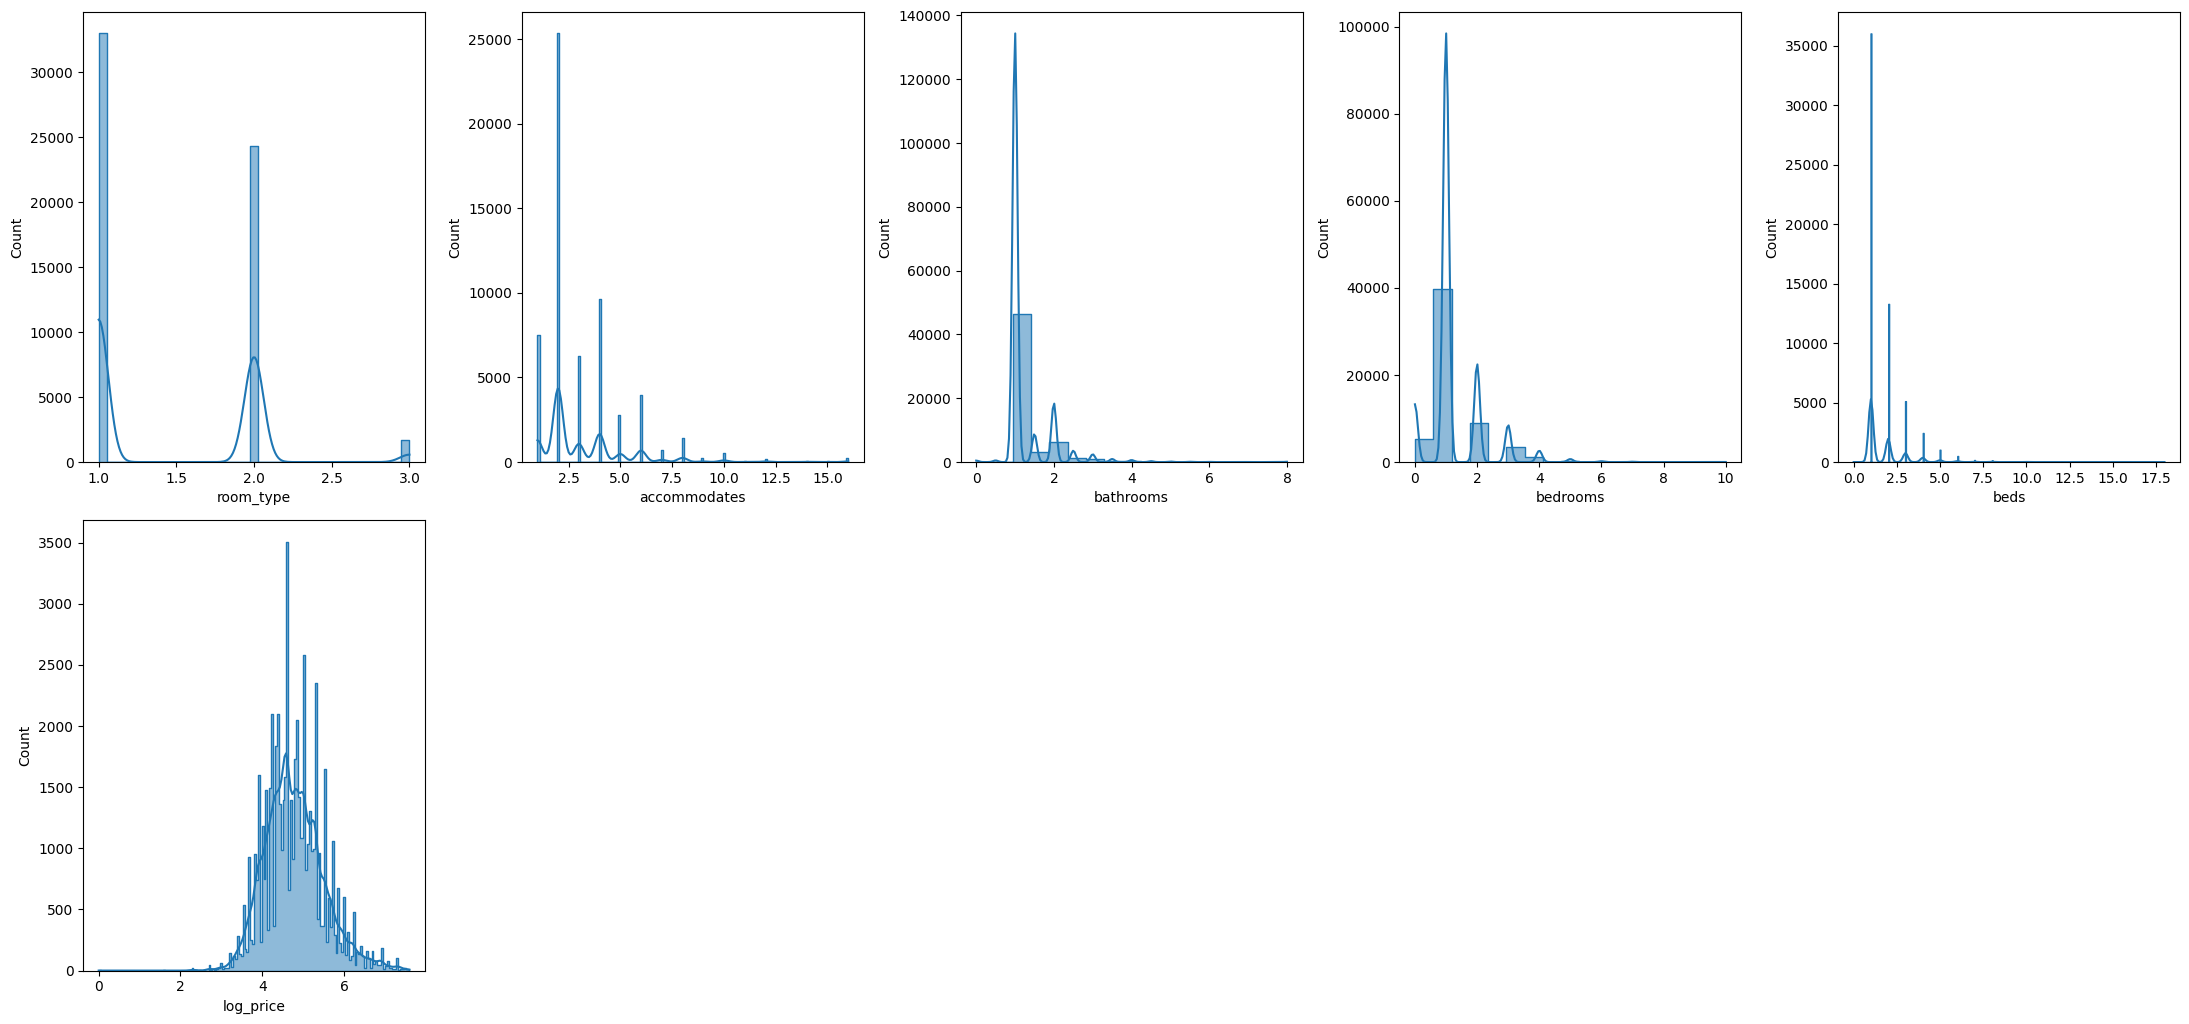

In [424]:
# See the distribution of all columns.
plt.figure(figsize=(22, 15))
plotnumber = 1

for column in combined_train_preprocess.columns:
    plt.subplot(3, 5, plotnumber)
    sns.histplot(combined_train_preprocess[column], element="step", kde=True)

    plotnumber += 1

plt.tight_layout()
plt.show()

### Train

In [425]:
X_train_clean = combined_train_preprocess.iloc[:, :-1]  # All columns except the last one
y_train_clean = combined_train_preprocess.iloc[:, -1]  # Last column (y)

X_val_clean = combined_val_preprocess.iloc[:, :-1]
y_val_clean = combined_val_preprocess.iloc[:, -1]

In [426]:
# Init new model
model = LinearRegression(learning_rate=0.01, n_iterations=1000)
model.fit(X_train_clean, y_train_clean, X_val_clean, y_val_clean)

Epoch 100:
  Train Loss: 1.438470
  Val Loss: 1.449427

Epoch 200:
  Train Loss: 1.202779
  Val Loss: 1.204714

Epoch 300:
  Train Loss: 1.102125
  Val Loss: 1.102815

Epoch 400:
  Train Loss: 1.022164
  Val Loss: 1.022779

Epoch 500:
  Train Loss: 0.952511
  Val Loss: 0.953143

Epoch 600:
  Train Loss: 0.890283
  Val Loss: 0.890866

Epoch 700:
  Train Loss: 0.834076
  Val Loss: 0.834557

Epoch 800:
  Train Loss: 0.783049
  Val Loss: 0.783400

Epoch 900:
  Train Loss: 0.736611
  Val Loss: 0.736824

Epoch 1000:
  Train Loss: 0.694298
  Val Loss: 0.694377



### Plot the result

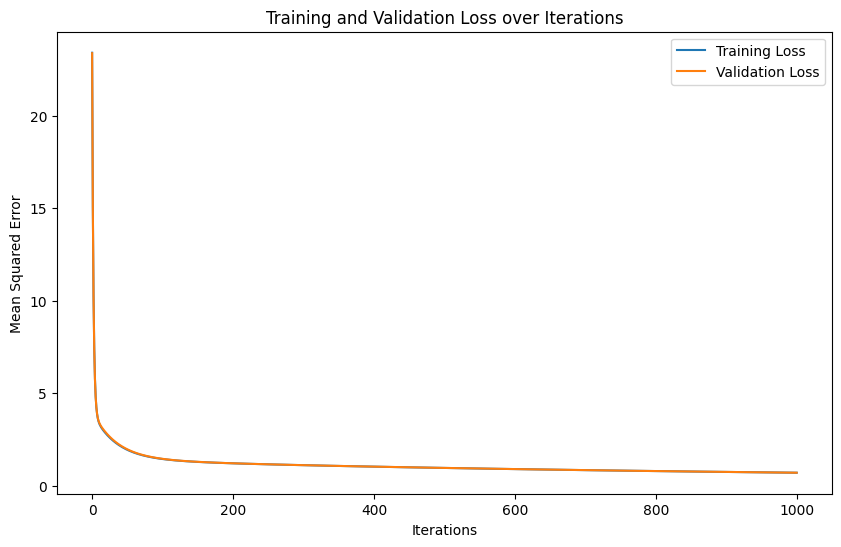

In [427]:
# Plot the losses
model.plot_losses()

Mean Squared Error on validation set: 0.6939718215528903


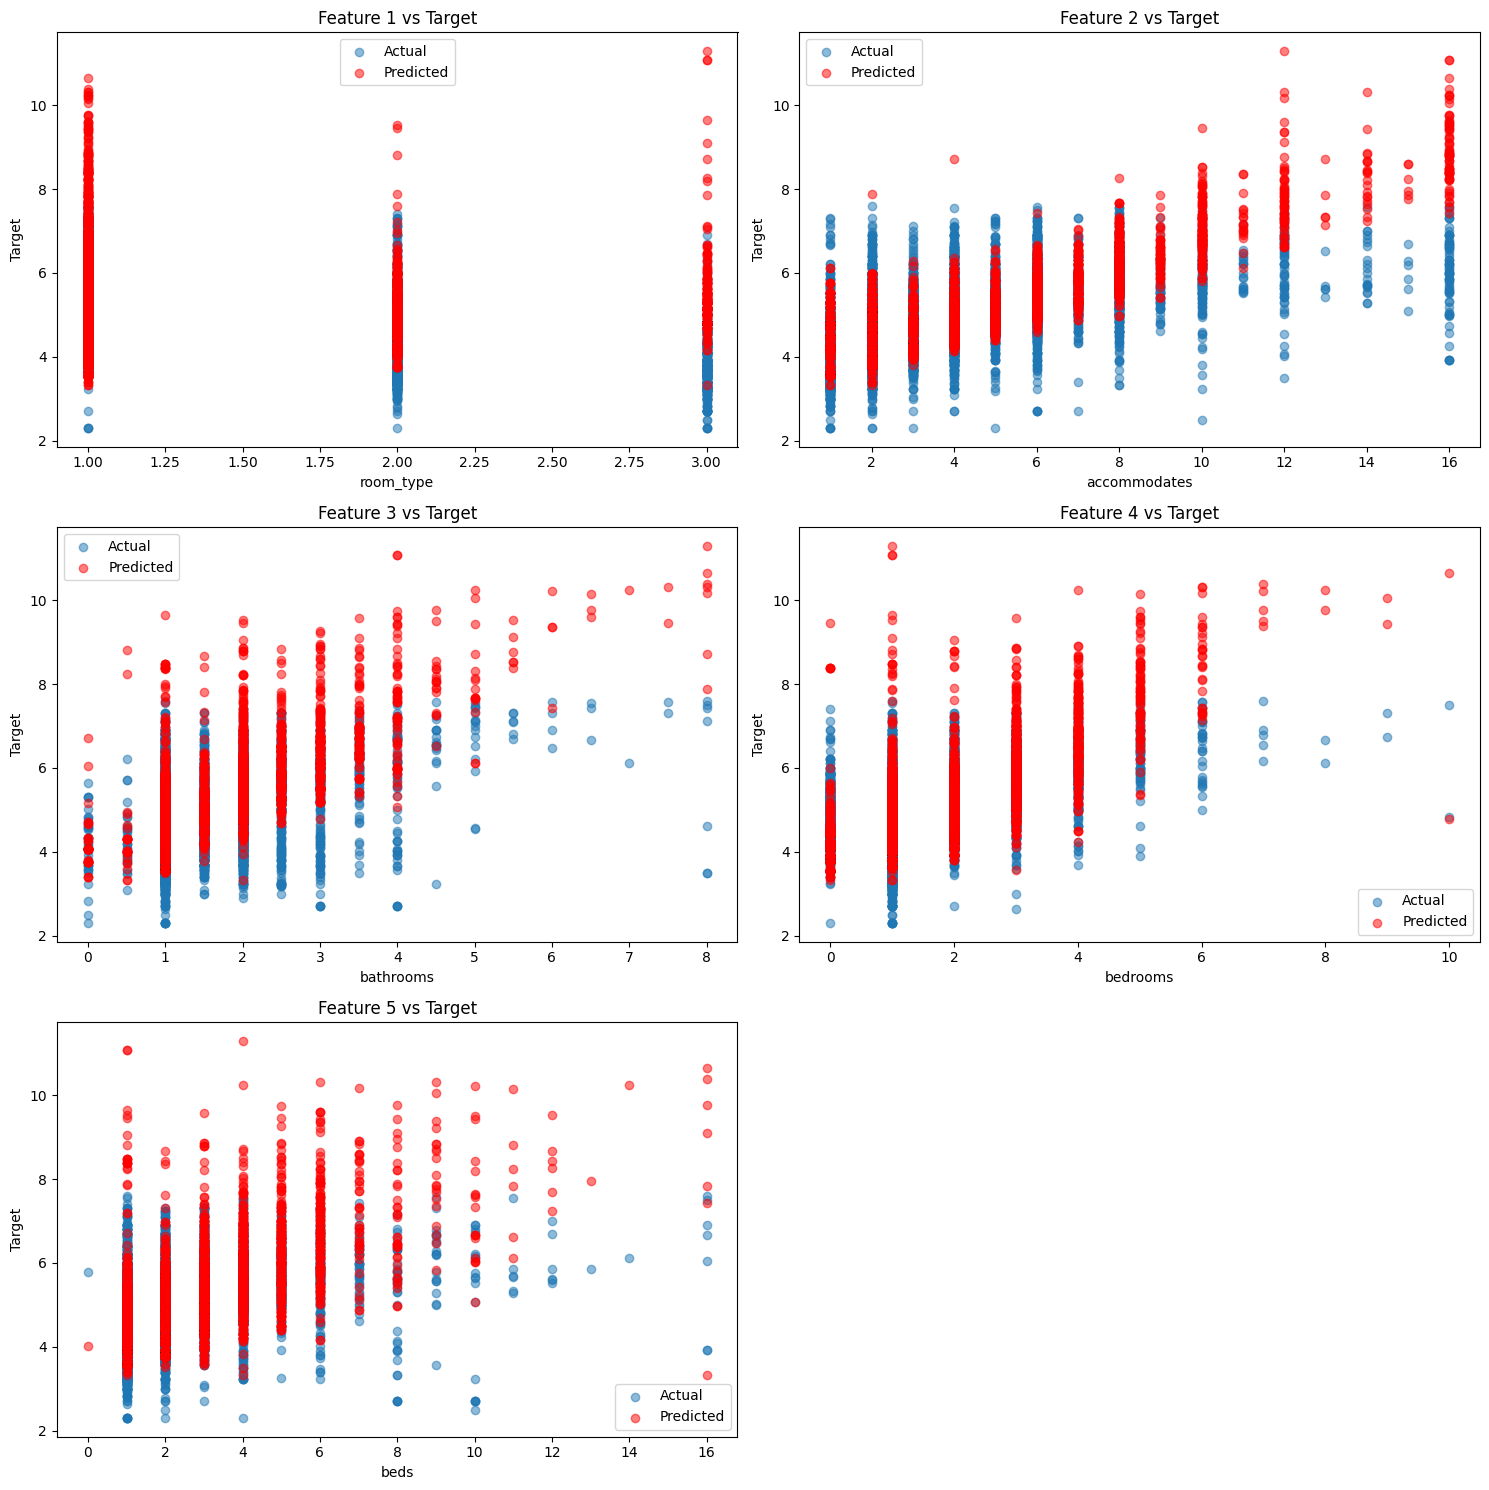

In [428]:
# Make predictions on validation set
y_pred_val = model.predict(X_val_clean)

# Calculate Mean Squared Error
print(f"Mean Squared Error on validation set: {mse(y_val_clean, y_pred_val)}")

# Plot the regression line
plot_regression_results(X_val_clean, y_val_clean, y_pred_val)

## Conclusion
Training a machine learning model without proper preprocessing is ineffective because raw data often contains noise, inconsistencies, and irrelevant features, which can hinder the model's ability to learn patterns, leading to poor performance and inaccurate predictions.

As we can see above, without preprocessing, the loss gets worsens with each iteration, leads to poor performance. The cause might be:
1. Unnormalized/unscaled data.
2. Outliers.
3. Non-stationary data, i.e. trends, seasonality, or changes in variance over time can confuse the model.
4. Class imbalance.

Preprocessing is crucial for machine learning models. Without it, the model may not learn appropriately, resulting in increasing loss values, poor performance, or even failure to converge. Proper data preparation ensures that models are fed clean, consistent, and well-structured data that aids learning rather than hinders it.